In [1]:
import matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

logo = plt.imread('../../Branding/globe.png')

In [3]:
logo = plt.imread('../../Branding/light_logo_1.png')

In [4]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

In [5]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")

In [6]:
basins = pd.concat([gpd.read_file("../../Nature/rivers/data/basins/europe/hydrobasins_europe.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/nearest/hydrobasins_neareast.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/namerica/hydrobasins_northam.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/camerica/hydrobasins_centralam.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/samerica/hydrobasins_southam.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/asia/hydrobasins_asia.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/aus/hydrobasins_austpacific.shp"),
                    gpd.read_file("../../Nature/rivers/data/basins/africa/hydrobasins_africa.shp")])

In [7]:
from shapely.ops import unary_union

geoms = [unary_union(basins.loc[basins['MAJ_NAME'] == poly_basin].geometry.tolist()) for poly_basin in basins.MAJ_NAME.unique().tolist()]
geoms_area = [geom.area for geom in geoms]
names = [poly_basin for poly_basin in basins.MAJ_NAME.unique().tolist()]

In [8]:
basins = gpd.GeoDataFrame(pd.DataFrame({"name": names, "area": geoms_area}), geometry=geoms)

In [9]:
basins = basins.sort_values(["area"], ascending=False)

In [10]:
print(basins)

                              name        area  \
46            Arctic Ocean Islands  720.214335   
81           Northwest Territories  706.792187   
183            Siberia, West Coast  580.879844   
229         Africa, North Interior  498.878278   
107                         Amazon  490.471802   
..                             ...         ...   
194                     Micronesia    0.100937   
193  North Marina Islands and Guam    0.099531   
195        Wake - Marshall Islands    0.081476   
190               Kiribati - Nauru    0.057760   
191                         Tuvalu    0.009184   

                                              geometry  
46   MULTIPOLYGON (((-56.60775 73.44234, -56.62777 ...  
81   MULTIPOLYGON (((-114.92917 67.82917, -114.9291...  
183  MULTIPOLYGON (((-172.60417 64.57917, -172.6041...  
229  POLYGON ((9.93750 24.20833, 9.93750 24.21250, ...  
107  MULTIPOLYGON (((-66.87500 -17.62083, -66.87500...  
..                                                 ...  


In [11]:
new_basins_copy = basins.copy()

colors = {
     'Siberia, West Coast': 'black', 
     'Ob': '#ffa500', 
     'Lena': '#808000', 
     'Yenisey': '#483d8b',
     'Siberia, North Coast': '#dc143c',
     'Amur': '#BE0032', 
     'Gobi Interior': 'lightgray', 
     'Volga': 'red', 
     'Arabian Peninsula': 'lightgray', 
     'Yangtze': 'blue', 
     'Tarim Interior': '#008856', 
     'Ganges - Bramaputra': 'darkgreen', 
     'Kara Sea Coast': '#228B22', 
     'Syr Darya': '#3cb371', 
     'Russia, Barents Sea Coast': 'blue', 
     'Caspian Sea, East Coast': '#2f4f4f', 
     'Tigris - Euphrates': '#0000ff',
     'Amu Darya': '#ff00ff', 
     'Huang He': 'red', 
     'Indus': '#BE0032', 
     'Central Iran': '#ff1493',
     'Mekong': 'darkgreen', 
     'Caspian Sea Coast': 'black', 
     'China Coast': 'blue',
     'Don': '#808000', 
     'Scandinavia, North Coast': '#483d8b', 
     'Lake Balkash': '#dc143c', 
     'Red Sea, East Coast': '#000080',
     'Sabarmati': 'blue',
     'Northern Dvina': '#8b008b',
     'Iceland': '#A1CAF1',
     'Finland': '#ff4500', 
     'Plateau of Tibet Interior': '#ffa500', 
     'Japan': '#008856', 
     'Bo Hai - Korean Bay, North Coast': '#882D17', 
     'Caspian Sea, South West Coast': '#228B22', 
     'Neva': '#3cb371',
     'Xun Jiang': '#875692', 
     'Ziya He, Interior': '#2f4f4f', 
     'Irrawaddy': 'crimson', 
     'Dnieper': '#ff00ff', 
     'Black Sea, South Coast': '#1e90ff', 
     'Mediterranean Sea, East Coast': '#db7093',
     'Ural': '#ffa500', 
     'Godavari': 'blue', 
     'Peninsula Malaysia': 'blue',
     'Philippines': '#A1CAF1', 
     'Salween': '#483d8b', 
     'Helmand': 'black',
     'Krishna': '#808000', 
     'Persian Gulf Coast': '#483d8b',
     'North and South Korea': 'black', 
     'Eastern Jordan - Syria': '#ffa500',
     'Russia, South East Coast': '#808000',
     'Arctic Ocean Islands': 'darkgreen',
     'Arabian Sea Coast': '#483d8b', 
     'Hamun-i-Mashkel': '#dc143c',
     'North Borneo Coast': 'lime', 
     'Viet Nam, Coast': 'blue', 
     'Hong (Red River)': '#8b008b', 
     'Chao Phraya': '#ff4500', 
     'Black Sea, North Coast': 'blue', 
     'Mahandi': 'crimson',
     'Daugava': 'darkgreen',
     'Kalimantan': '#228B22', 
     'Narmada': 'purple',
     'Farahrud': '#875692', 
     'Adriatic Sea - Greece - Black Sea Coast': '#2f4f4f', 
     'Bay of Bengal, North East Coast': '#0000ff',
     'India West Coast': '#ff00ff', 
     'Cauvery': '#1e90ff',
     'Pennar': '#BE0032', 
     'Tapti': '#ff1493',
     'Yasai': '#882D17', 
     'South China Sea Coast': 'black',
     'Narva': 'blue',
     'Sri Lanka': '#808000', 
     'India East Coast': '#483d8b',
     'India South Coast': '#dc143c', 
     'Sittang': '#000080', 
     'Brahamani': 'darkorange',
     'Gulf of Thailand Coast': '#8b008b', 
     'Dead Sea': '#ff4500', 
     'India North East Coast': '#ffa500',
     'Mahi': '#008856', 
     'Hainan': '#882D17', 
     'Baltic Sea Coast': '#228B22', 
     'Sinai Peninsula': '#3cb371',
     'Andaman - Nicobar Islands': '#875692', 
     'Taiwan': '#2f4f4f',
     'Lake Chad': 'black',
     'Nile': 'blue',
     'Rift Valley': '#808000', 
     'Congo': '#483d8b', 
     'Niger': '#dc143c', 
     'Volta': '#000080', 
     'Africa, West Coast': 'green', 
     'Africa, North West Coast': '#8b008b', 
     'Mediterranean South Coast': '#ff4500',
     'Africa, Red Sea - Gulf of Aden Coast': '#ffa500',
     'Shebelli - Juba': '#008856', 
     'Africa, East Central Coast': '#882D17',
     'Madasgacar': '#228B22', 
     'Zambezi': '#3cb371', 
     'Africa, Indian Ocean Coast': '#875692', 
     'Limpopo': '#2f4f4f',
     'South Africa, South Coast': '#0000ff',
     'South Africa, West Coast': '#ff00ff', 
     'Orange': '#1e90ff', 
     'Africa, South Interior': '#db7093',
     'Namibia, Coast': '#ff1493',
     'Angola, Coast': 'darkgreen', 
     'Gulf of Guinea': '#ee82ee',
     'Senegal': '#A1CAF1', 
     'Africa, North Interior': 'orange',
     'Philippines': '#ff00ff', 
     'North Marina Islands and Guam': '#483d8b',
     'Palau and East Indonesia': '#ffa500',
     'North Borneo Coast': 'green',
     'Micronesia': 'blue', 
     'Sumatra': '#dc143c', 
     'Kalimantan': 'blue', 
     'Sulawesi': '#483d8b',
     'Irian Jaya Coast': '#000080',
     'Papua New Guinea Coast': '#3cb371',
     'Sepik': '#875692', 
     'Fly': '#2f4f4f',
     'Java - Timor': 'crimson',
     'Solomon Islands': '#ff00ff',
     'Australia, North Coast': 'darkgreen',
     'South Pacific Islands': '#db7093',
     'Australia, Interior': '#ffa500',
     'Australia, East Coast': 'blue', 
     'Australia, West Coast': '#ee82ee', 
     'Murray - Darling': 'crimson',
     'Australia, South Coast': '#483d8b',
     'New Zealand': 'black',
     'Tasmania': '#808000',
     'Spain - Portugal, Atlantic Coast': 'black',
     'Douro': 'blue', 
     'Tagus': '#808000', 
     'Guadiana': '#483d8b',
     'Spain, South and East Coast': '#dc143c', 
     'Guadalquivir': '#000080', 
     'Ebro': 'green',
     'Gironde': '#8b008b',
     'France, West Coast': '#ff4500', 
     'Loire': '#ffa500', 
     'Seine': '#008856',
     'Rhône': '#882D17', 
     'France, South Coast': '#228B22',
     'England and Wales': '#3cb371',  
     'Ireland': '#875692', 
     'Scotland': '#2f4f4f',
     'Scheldt': '#0000ff',
     'Rhine': 'green',
     'Maas': '#1e90ff',
     'Ems - Weser': '#db7093', 
     'Po': 'black', 
     'Italy, West Coast': 'darkgreen', 
     'Mediterranean Sea Islands': '#ee82ee', 
     'Tiber': '#A1CAF1',
     'Italy, East Coast': 'orange', 
     'Danube': 'red', 
     'Elbe': 'blue', 
     'Sweden': '#808000', 
     'Wisla': '#483d8b', 
     'Oder': '#008856', 
     'Adriatic Sea - Greece - Black Sea Coast': '#000080', 
     'Dnieper': 'green', 
     'Poland Coast': '#8b008b',
     'Neman': '#ff4500', 
     'Dniester': '#ffa500', 
     'Don': '#dc143c',
     'Volga': 'blue', 
     'Ural': '#228B22', 
     'Narva': '#3cb371',
     'Black Sea, North Coast': '#875692',
     'Caspian Sea Coast': '#2f4f4f', 
     'Baltic Sea Coast': '#0000ff', 
     'Neva': '#ff00ff', 
     'Scandinavia, North Coast': '#1e90ff', 
     'Finland': '#db7093', 
     'Russia, Barents Sea Coast': '#ff1493',
     'Northern Dvina': 'darkgreen', 
     'Denmark - Germany Coast': '#ee82ee',
     'Daugava': '#A1CAF1', 
     'Black Sea, South Coast': 'orange',
     'Mediterranean Sea, East Coast': 'black',
     'Caspian Sea, South West Coast': 'blue',
     'Tigris - Euphrates': '#808000',
     'Gulf of Mexico, North Atlantic Coast': 'black',
     'United States, North Atlantic Coast': 'orange', 
     'Mississippi - Missouri': '#BE0032', 
     'Gulf Coast': '#808000',
     'California': '#483d8b', 
     'Great Basin': '#3cb371',
     'North America, Colorado': '#000080', 
     'Columbia and Northwestern United States': 'green',
     'Pacific and Arctic Coast': '#8b008b', 
     'Fraser': '#ff4500', 
     'Saskatchewan - Nelson': '#ffa500', 
     'Northwest Territories': '#008856',
     'Hudson Bay Coast': '#882D17', 
     'Atlantic Ocean Seaboard': '#228B22', 
     'Churchill': '#dc143c',
     'St Lawrence': '#875692',
     'St John': '#2f4f4f',
     'Mackenzie': '#0000ff', 
     'Arctic Ocean Islands': '#ff00ff',
     'Río Grande - Bravo': '#1e90ff', 
     'Mexico, Northwest Coast': '#db7093', 
     'Baja California': 'black',
     'Mexico, Interior': '#ff1493',
     'North Gulf': 'darkgreen', 
     'Río Verde': '#ee82ee', 
     'Río Lerma': '#A1CAF1',
     'Pacific Central Coast': '#875692', 
     'Río Balsas': '#008856',
     'Isthmus of Tehuantepec': '#0067A5',
     'Grijalva - Usumacinta': '#BE0032', 
     'Yucatán Peninsula': '#222222', 
     'Southern Central America': 'orange', 
     'Caribbean': '#F3C300', 
     'Papaloapan': 'blue',
     'Caribbean Coast': 'black',
     'Magdalena': 'blue',
     'Orinoco': '#808000', 
     'Northeast South America, South Atlantic Coast': '#483d8b',
     'Amazon': '#dc143c', 
     'Tocantins': '#000080', 
     'North Brazil, South Atlantic Coast': 'green', 
     'Parnaiba': '#8b008b',
     'East Brazil, South Atlantic Coast': '#ff4500', 
     'Sao Francisco': '#ffa500', 
     'Uruguay - Brazil, South Atlantic Coast': '#008856', 
     'La Plata': '#882D17',
     'North Argentina, South Atlantic Coast': '#228B22', 
     'South America, Colorado': '#3cb371', 
     'Negro': '#875692', 
     'South Argentina, South Atlantic Coast': '#2f4f4f', 
     'Central Patagonia Highlands': '#0000ff', 
     'Colombia - Ecuador, Pacific Coast': '#ff00ff', 
     'Peru, Pacific Coast': '#1e90ff',
     'North Chile, Pacific Coast': '#db7093',
     'South Chile, Pacific Coast': '#ff1493',
     'La Puna Region': 'darkgreen', 
     'Salinas Grandes': '#ee82ee', 
     'Mar Chiquita': '#A1CAF1', 
     'Pampas Region': 'orange',
     }

colors_df = pd.DataFrame({'basin': colors.keys(), 'colors': colors.values()})

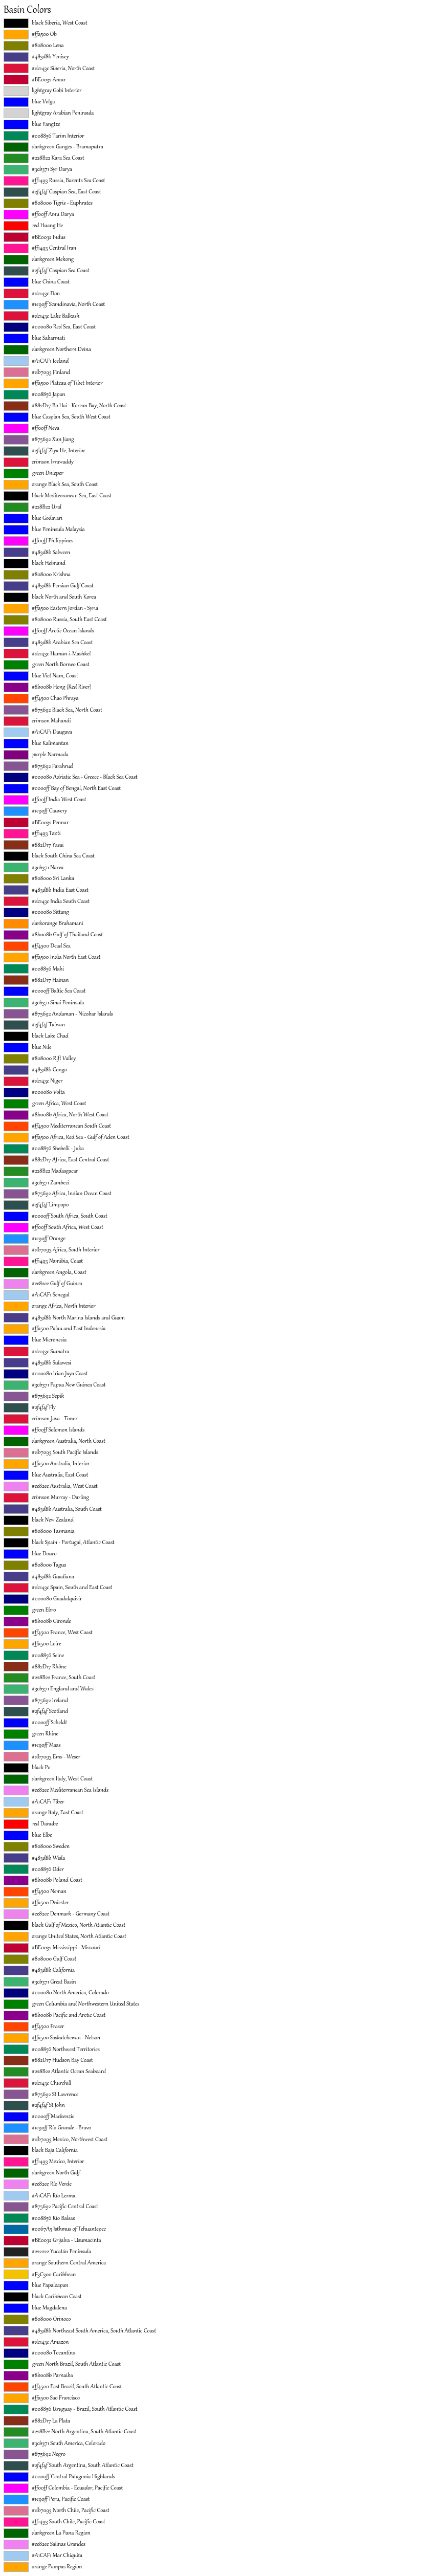

In [12]:
cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colors.keys())
ncols = 1
nrows = len(colors.keys())
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colors.values(), colors.keys())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


In [13]:
new_basins_copy = pd.merge(new_basins_copy, colors_df, left_on='name', right_on='basin', how='left')

In [14]:
new_basins_copy = new_basins_copy[['name', 'geometry', 'colors']]

In [15]:
new_basins_copy = new_basins_copy[~new_basins_copy['colors'].isna()]

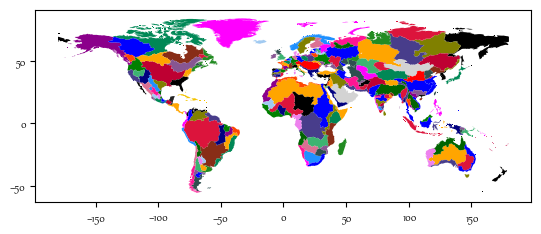

In [16]:
new_basins_copy.plot(color=new_basins_copy['colors'])
plt.savefig("world_test.png", dpi=1000)

In [17]:
lakes = gpd.sjoin(lakes, new_basins_copy, op="within")

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\AppData\Local\Temp\ipykernel_13412\499965864.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  lakes = gpd.sjoin(lakes, new_basins_copy, op="within")


In [18]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
df = df[df['CONTINENT'] != 'Antarctica']
x = unary_union(df.geometry.tolist())
y = x.boundary
boundary = gpd.GeoDataFrame(pd.DataFrame({'name': ['boundary']}), crs="EPSG:4326", geometry=[y])

In [19]:
rivers = pd.concat([gpd.read_file("../../Nature/rivers/data/rivers/samerica/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/europe/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/asia/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/siberia/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/aus/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/namerica/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/artic/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/africa/a00000009.gdbtable"),
                    gpd.read_file("../../Nature/rivers/data/rivers/greenland/a00000009.gdbtable")])

In [20]:
rivers = rivers.loc[rivers['ORD_FLOW'] < 8]

In [21]:
rivers_basins = gpd.sjoin(rivers, new_basins_copy, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\AppData\Local\Temp\ipykernel_13412\2125334413.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  rivers_basins = gpd.sjoin(rivers, new_basins_copy, op='within')


In [22]:
rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.01, max_value=0.4)

#fig, ax = plt.subplots(facecolor='#FCF6F5FF')
#fig.set_size_inches(7, 3.5)

#rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
#lakes.plot(ax=ax, color=lakes['colors'])
#boundary.plot(ax=ax, color="black", lw=0.1)

#ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

#plt.savefig("outputs/world.jpeg", dpi=1000, bbox_inches='tight')
#plt.show()

In [23]:
print(rivers_basins)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0        60000001          0  60000001       0.97         0.0    6.500000   
1        60000002          0  60000002       1.16         0.0    5.300000   
2        60000003          0  60000003       3.37         0.0    7.200000   
3        60000004          0  60000004       3.37         0.0    6.300000   
4        60000005          0  60000005       3.07         0.0    7.900000   
...           ...        ...       ...        ...         ...         ...   
1527533  11527534   11527539  11527539       6.37         2.7   67.599998   
1527534  11527535   11527539  11527539       6.33         2.9   79.400002   
1527538  11527539          0  11527539       2.50         0.0   82.099998   
1527544  11527545   11527547  11527547       7.36         3.3   17.799999   
1527546  11527547          0  11527547       3.11         0.0   20.900000   

         CATCH_SKM   UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS 

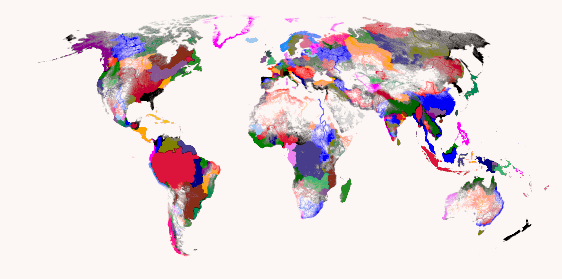

In [30]:
rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.01, max_value=0.4)

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
ax = plt.axes(projection=ccrs.Robinson())
rivers_basins.plot(ax=ax, edgecolor='face', 
                   color=rivers_basins['colors'], 
                   lw=rivers_basins['LW_DIST_UP_KM'],
                   transform=ccrs.Geodetic())
lakes.plot(ax=ax, color=lakes['colors'], transform=ccrs.Geodetic())

ax.axis('off')

plt.savefig("outputs/world_rob_high_res.png", dpi=6000, bbox_inches='tight')
plt.show()

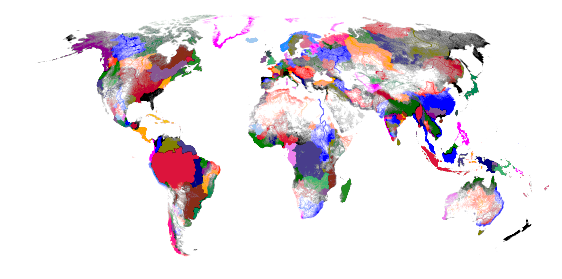

In [29]:
rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.01, max_value=0.4)

fig = plt.figure(facecolor='white')
fig.set_size_inches(7, 3.5)
ax = plt.axes(projection=ccrs.Robinson())
rivers_basins.plot(ax=ax, edgecolor='face', 
                   color=rivers_basins['colors'], 
                   lw=rivers_basins['LW_DIST_UP_KM'],
                  transform=ccrs.Geodetic())
lakes.plot(ax=ax, color=lakes['colors'], transform=ccrs.Geodetic())

ax.axis('off')

plt.savefig("outputs/world_rob_high_res_white.png", dpi=7000, bbox_inches='tight')
plt.show()

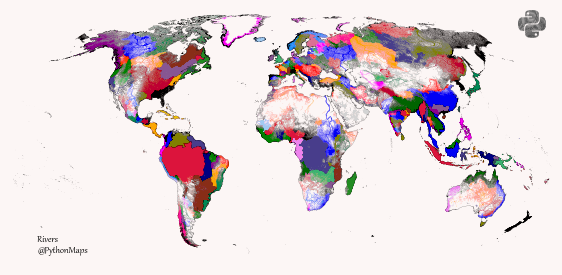

In [26]:
rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.01, max_value=0.4)

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
ax = plt.axes(projection=ccrs.Robinson())
rivers_basins.plot(ax=ax, edgecolor='face', 
                   color=rivers_basins['colors'], 
                   lw=rivers_basins['LW_DIST_UP_KM'],
                  transform=ccrs.Geodetic())
lakes.plot(ax=ax, color=lakes['colors'], transform=ccrs.Geodetic())
boundary.plot(ax=ax, color="black", lw=0.1, transform=ccrs.Geodetic() )

ax.axis('off')
newax = fig.add_axes([0.81, 0.78, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.05, f"Rivers \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes)

plt.savefig("outputs/world_rob_boundary.jpeg", dpi=750, bbox_inches='tight')
plt.show()

In [27]:
rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.01, max_value=0.4)

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
ax = plt.axes(projection=ccrs.Mercator())
rivers_basins.plot(ax=ax, edgecolor='face', 
                   color=rivers_basins['colors'], 
                   lw=rivers_basins['LW_DIST_UP_KM'],
                  transform=ccrs.Geodetic())
lakes.plot(ax=ax, color=lakes['colors'], transform=ccrs.Geodetic())
boundary.plot(ax=ax, color="white", lw=0.1, transform=ccrs.Geodetic() )

ax.axis('off')
newax = fig.add_axes([0.76, 0.78, 0.08, 0.08], anchor='NE')
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.05, f"Rivers \n@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes)

plt.savefig("outputs/world_mer_boundary.jpeg", dpi=1000, bbox_inches='tight')
plt.show()

Exception ignored in: <function BaseGeometry.__del__ at 0x000001D27674AB80>
Traceback (most recent call last):
  File "C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\shapely\geometry\base.py", line 194, in _empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 

KeyboardInterrupt


KeyboardInterrupt



Error in callback <function flush_figures at 0x000001D279EE61F0> (for post_execute):


In [ ]:
rivers_basins['colors'][[rivers_basins['colors']] == 'black'] = 'white'

In [ ]:
rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.01, max_value=0.4)

fig = plt.figure(facecolor='black')
fig.set_size_inches(7, 3.5)
ax = plt.axes(projection=ccrs.Robinson())
rivers_basins.plot(ax=ax, edgecolor='face', 
                   color=rivers_basins['colors'], 
                   lw=rivers_basins['LW_DIST_UP_KM'],
                  transform=ccrs.Geodetic())
lakes.plot(ax=ax, color=lakes['colors'], transform=ccrs.Geodetic())
boundary.plot(ax=ax, color="white", lw=0.1, )

ax.axis('off')
newax = fig.add_axes([0.81, 0.78, 0.08, 0.08], anchor='NE')
newax.imshow(im)
newax.axis('off')
txt = ax.text(0.05, 0.05, f"Rivers \n@PythonMaps",
              size=fontsize,
              color='white',
              transform = ax.transAxes)

plt.savefig("outputs/world_rob_boundary_dark.jpeg", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
rivers_basins['colors'][[rivers_basins['colors']] == 'white'] = 'black'

In [ ]:
=

In [ ]:
new_basins_copy = basins.copy()

colors = {
     'Siberia, West Coast': 'black', 
     'Ob': '#ffa500', 
     'Lena': '#808000', 
     'Yenisey': '#483d8b',
     'Siberia, North Coast': '#dc143c',
     'Amur': 'lime', 
     'Gobi Interior': 'lightgray', 
     'Volga': 'red', 
     'Arabian Peninsula': 'lightgray', 
     'Yangtze': 'blue', 
     'Tarim Interior': '#008856', 
     'Ganges - Bramaputra': 'darkgreen', 
     'Kara Sea Coast': '#228B22', 
     'Syr Darya': '#3cb371', 
     'Russia, Barents Sea Coast': 'blue', 
     'Caspian Sea, East Coast': '#2f4f4f', 
     'Tigris - Euphrates': '#0000ff',
     'Amu Darya': '#ff00ff', 
     'Huang He': 'red', 
     'Indus': '#BE0032', 
     'Central Iran': '#ff1493',
     'Mekong': 'darkgreen', 
     'Caspian Sea Coast': 'black', 
     'China Coast': 'blue',
     'Don': '#808000', 
     'Scandinavia, North Coast': '#483d8b', 
     'Lake Balkash': '#dc143c', 
     'Red Sea, East Coast': '#000080',
     'Sabarmati': 'blue',
     'Northern Dvina': '#8b008b',
     'Iceland': '#A1CAF1',
     'Finland': '#ff4500', 
     'Plateau of Tibet Interior': '#ffa500', 
     'Japan': '#008856', 
     'Bo Hai - Korean Bay, North Coast': '#882D17', 
     'Caspian Sea, South West Coast': '#228B22', 
     'Neva': '#3cb371',
     'Xun Jiang': '#875692', 
     'Ziya He, Interior': '#2f4f4f', 
     'Irrawaddy': 'crimson', 
     'Dnieper': '#ff00ff', 
     'Black Sea, South Coast': '#1e90ff', 
     'Mediterranean Sea, East Coast': '#db7093',
     'Ural': '#ffa500', 
     'Godavari': 'blue', 
     'Peninsula Malaysia': 'blue',
     'Philippines': '#A1CAF1', 
     'Salween': '#483d8b', 
     'Helmand': 'black',
     'Krishna': '#808000', 
     'Persian Gulf Coast': '#483d8b',
     'North and South Korea': 'black', 
     'Eastern Jordan - Syria': '#ffa500',
     'Russia, South East Coast': '#808000',
     'Arctic Ocean Islands': 'darkgreen',
     'Arabian Sea Coast': '#483d8b', 
     'Hamun-i-Mashkel': '#dc143c',
     'North Borneo Coast': 'lime', 
     'Viet Nam, Coast': 'blue', 
     'Hong (Red River)': '#8b008b', 
     'Chao Phraya': '#ff4500', 
     'Black Sea, North Coast': 'blue', 
     'Mahandi': 'crimson',
     'Daugava': 'darkgreen',
     'Kalimantan': '#228B22', 
     'Narmada': 'purple',
     'Farahrud': '#875692', 
     'Adriatic Sea - Greece - Black Sea Coast': '#2f4f4f', 
     'Bay of Bengal, North East Coast': '#0000ff',
     'India West Coast': '#ff00ff', 
     'Cauvery': '#1e90ff',
     'Pennar': '#BE0032', 
     'Tapti': '#ff1493',
     'Yasai': '#882D17', 
     'South China Sea Coast': 'black',
     'Narva': 'blue',
     'Sri Lanka': '#808000', 
     'India East Coast': '#483d8b',
     'India South Coast': '#dc143c', 
     'Sittang': '#000080', 
     'Brahamani': 'darkorange',
     'Gulf of Thailand Coast': '#8b008b', 
     'Dead Sea': '#ff4500', 
     'India North East Coast': '#ffa500',
     'Mahi': '#008856', 
     'Hainan': '#882D17', 
     'Baltic Sea Coast': '#228B22', 
     'Sinai Peninsula': '#3cb371',
     'Andaman - Nicobar Islands': '#875692', 
     'Taiwan': '#2f4f4f',
     'Lake Chad': 'black',
     'Nile': 'blue',
     'Rift Valley': '#808000', 
     'Congo': '#483d8b', 
     'Niger': '#dc143c', 
     'Volta': '#000080', 
     'Africa, West Coast': 'green', 
     'Africa, North West Coast': '#8b008b', 
     'Mediterranean South Coast': '#ff4500',
     'Africa, Red Sea - Gulf of Aden Coast': '#ffa500',
     'Shebelli - Juba': '#008856', 
     'Africa, East Central Coast': '#882D17',
     'Madasgacar': '#228B22', 
     'Zambezi': '#3cb371', 
     'Africa, Indian Ocean Coast': '#875692', 
     'Limpopo': '#2f4f4f',
     'South Africa, South Coast': '#0000ff',
     'South Africa, West Coast': '#ff00ff', 
     'Orange': '#1e90ff', 
     'Africa, South Interior': '#db7093',
     'Namibia, Coast': '#ff1493',
     'Angola, Coast': 'darkgreen', 
     'Gulf of Guinea': '#ee82ee',
     'Senegal': '#A1CAF1', 
     'Africa, North Interior': 'orange',
     'Philippines': '#ff00ff', 
     'North Marina Islands and Guam': '#483d8b',
     'Palau and East Indonesia': '#ffa500',
     'North Borneo Coast': 'green',
     'Micronesia': 'blue', 
     'Sumatra': '#dc143c', 
     'Kalimantan': 'blue', 
     'Sulawesi': '#483d8b',
     'Irian Jaya Coast': '#000080',
     'Papua New Guinea Coast': '#3cb371',
     'Sepik': '#875692', 
     'Fly': '#2f4f4f',
     'Java - Timor': 'crimson',
     'Solomon Islands': '#ff00ff',
     'Australia, North Coast': 'darkgreen',
     'South Pacific Islands': '#db7093',
     'Australia, Interior': '#ffa500',
     'Australia, East Coast': 'blue', 
     'Australia, West Coast': '#ee82ee', 
     'Murray - Darling': 'crimson',
     'Australia, South Coast': '#483d8b',
     'New Zealand': 'black',
     'Tasmania': '#808000',
     'Spain - Portugal, Atlantic Coast': 'black',
     'Douro': 'blue', 
     'Tagus': '#808000', 
     'Guadiana': '#483d8b',
     'Spain, South and East Coast': '#dc143c', 
     'Guadalquivir': '#000080', 
     'Ebro': 'green',
     'Gironde': '#8b008b',
     'France, West Coast': '#ff4500', 
     'Loire': '#ffa500', 
     'Seine': '#008856',
     'Rhône': '#882D17', 
     'France, South Coast': '#228B22',
     'England and Wales': '#3cb371',  
     'Ireland': '#875692', 
     'Scotland': '#2f4f4f',
     'Scheldt': '#0000ff',
     'Rhine': 'green',
     'Maas': '#1e90ff',
     'Ems - Weser': '#db7093', 
     'Po': 'black', 
     'Italy, West Coast': 'darkgreen', 
     'Mediterranean Sea Islands': '#ee82ee', 
     'Tiber': '#A1CAF1',
     'Italy, East Coast': 'orange', 
     'Danube': 'red', 
     'Elbe': 'blue', 
     'Sweden': '#808000', 
     'Wisla': '#483d8b', 
     'Oder': '#008856', 
     'Adriatic Sea - Greece - Black Sea Coast': '#000080', 
     'Dnieper': 'green', 
     'Poland Coast': '#8b008b',
     'Neman': '#ff4500', 
     'Dniester': '#ffa500', 
     'Don': '#dc143c',
     'Volga': 'blue', 
     'Ural': '#228B22', 
     'Narva': '#3cb371',
     'Black Sea, North Coast': '#875692',
     'Caspian Sea Coast': '#2f4f4f', 
     'Baltic Sea Coast': '#0000ff', 
     'Neva': '#ff00ff', 
     'Scandinavia, North Coast': '#1e90ff', 
     'Finland': '#db7093', 
     'Russia, Barents Sea Coast': '#ff1493',
     'Northern Dvina': 'darkgreen', 
     'Denmark - Germany Coast': '#ee82ee',
     'Daugava': '#A1CAF1', 
     'Black Sea, South Coast': 'orange',
     'Mediterranean Sea, East Coast': 'black',
     'Caspian Sea, South West Coast': 'blue',
     'Tigris - Euphrates': '#808000',
     'Gulf of Mexico, North Atlantic Coast': 'black',
     'United States, North Atlantic Coast': 'orange', 
     'Mississippi - Missouri': '#BE0032', 
     'Gulf Coast': '#808000',
     'California': '#483d8b', 
     'Great Basin': '#3cb371',
     'North America, Colorado': '#000080', 
     'Columbia and Northwestern United States': 'green',
     'Pacific and Arctic Coast': '#8b008b', 
     'Fraser': '#ff4500', 
     'Saskatchewan - Nelson': '#ffa500', 
     'Northwest Territories': '#008856',
     'Hudson Bay Coast': '#882D17', 
     'Atlantic Ocean Seaboard': '#228B22', 
     'Churchill': '#dc143c',
     'St Lawrence': '#875692',
     'St John': '#2f4f4f',
     'Mackenzie': '#0000ff', 
     'Arctic Ocean Islands': '#ff00ff',
     'Río Grande - Bravo': '#1e90ff', 
     'Mexico, Northwest Coast': '#db7093', 
     'Baja California': 'black',
     'Mexico, Interior': '#ff1493',
     'North Gulf': 'darkgreen', 
     'Río Verde': '#ee82ee', 
     'Río Lerma': '#A1CAF1',
     'Pacific Central Coast': '#875692', 
     'Río Balsas': '#008856',
     'Isthmus of Tehuantepec': '#0067A5',
     'Grijalva - Usumacinta': '#BE0032', 
     'Yucatán Peninsula': '#222222', 
     'Southern Central America': 'orange', 
     'Caribbean': '#F3C300', 
     'Papaloapan': 'blue',
     'Caribbean Coast': 'black',
     'Magdalena': 'blue',
     'Orinoco': '#808000', 
     'Northeast South America, South Atlantic Coast': '#483d8b',
     'Amazon': '#dc143c', 
     'Tocantins': '#000080', 
     'North Brazil, South Atlantic Coast': 'green', 
     'Parnaiba': '#8b008b',
     'East Brazil, South Atlantic Coast': '#ff4500', 
     'Sao Francisco': '#ffa500', 
     'Uruguay - Brazil, South Atlantic Coast': '#008856', 
     'La Plata': '#882D17',
     'North Argentina, South Atlantic Coast': '#228B22', 
     'South America, Colorado': '#3cb371', 
     'Negro': '#875692', 
     'South Argentina, South Atlantic Coast': '#2f4f4f', 
     'Central Patagonia Highlands': '#0000ff', 
     'Colombia - Ecuador, Pacific Coast': '#ff00ff', 
     'Peru, Pacific Coast': '#1e90ff',
     'North Chile, Pacific Coast': '#db7093',
     'South Chile, Pacific Coast': '#ff1493',
     'La Puna Region': 'darkgreen', 
     'Salinas Grandes': '#ee82ee', 
     'Mar Chiquita': '#A1CAF1', 
     'Pampas Region': 'orange',
     }

colors_df = pd.DataFrame({'basin': colors.keys(), 'colors': colors.values()})